In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import pingouin as pg
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu, norm
from matplotlib.ticker import FuncFormatter
from statannotations.Annotator import Annotator
from scipy.stats import rankdata

In [26]:
df2 = pd.read_csv('source/FReDA2.csv')

In [27]:
# def clean_touch_values(series):
#     return np.where(
#         (series > 0) & (series < 1), 1,
#         np.where((series < 0) & (series > -1), -1, np.round(series))
#     )
#
#
# col_names = [
#     'Couple Frequency of Touch',
#     'Couple Wish for Touch',
#     'Couple Difference of Touch',
# ]
#
# for col in col_names:
#     df2[col] = clean_touch_values(df2[col])

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'High Frequency Agreement'),
  Text(1, 0, 'Low Frequency Agreement'),
  Text(2, 0, 'Non-Touch Agreement'),
  Text(3, 0, 'Saturated Agreement'),
  Text(4, 0, 'Deprived Agreement'),
  Text(5, 0, 'Disagreement')])

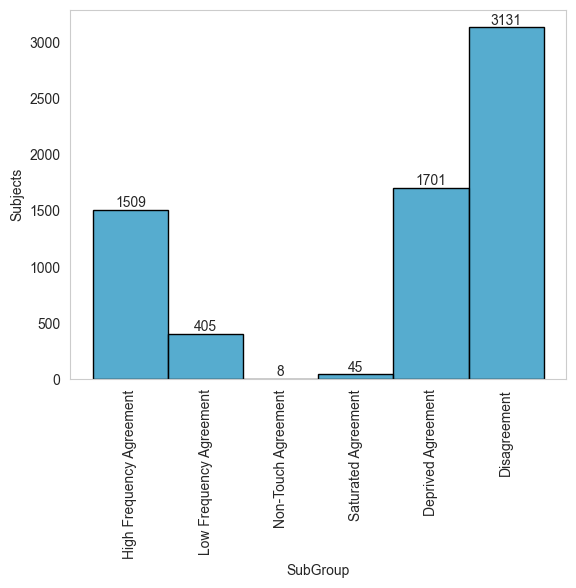

In [28]:
df2['SubGroup'] = pd.Categorical(df2['SubGroup'], ['High Frequency Agreement',
                                                   'Low Frequency Agreement',
                                                   'Non-Touch Agreement',
                                                   'Saturated Agreement',
                                                   'Deprived Agreement',
                                                   'Disagreement'])
ax = sns.histplot(data=df2, x='SubGroup',
                  element='bars',
                  binwidth=0.5,
                  color='#1d91c0',
                  common_norm=False,
                  multiple="dodge",
                  linewidth=1,
                  edgecolor='black',
                  )
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,  # x position (center of bar)
        height,  # y position (top of bar)
        int(height),  # text = count
        ha="center", va="bottom"  # align text
    )
plt.grid(False)
plt.ylabel("Subjects")
plt.xticks(rotation=90, )
#plt.savefig('output/img_bg/subgroup_histogram.png', dpi=350, transparent=False, bbox_inches='tight')

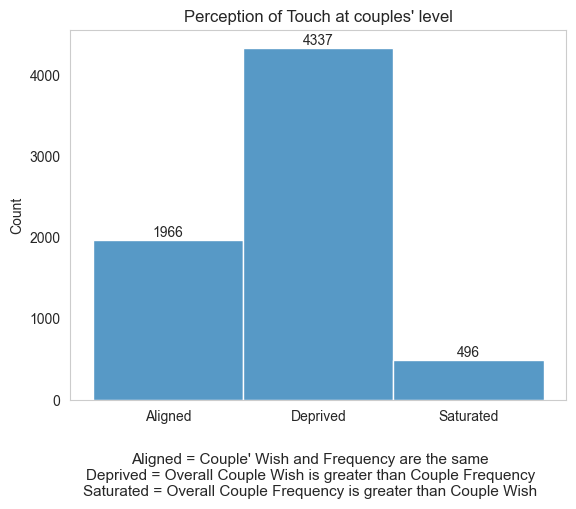

In [29]:
ax = sns.histplot(df2, x='Couple Perception of Touch')
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,
        height,
        int(height),
        ha="center", va="bottom"
    )
plt.grid(False)
plt.xlabel("")
plt.title("Perception of Touch at couples' level")
plt.suptitle("Aligned = Couple' Wish and Frequency are the same"
             "\nDeprived = Overall Couple Wish is greater than Couple Frequency"
             "\nSaturated = Overall Couple Frequency is greater than Couple Wish",
             fontsize=11,
             y=-0
             )
# plt.savefig('output/img_bg/groups/histo_couples_touch.png', dpi=350, transparent=False, bbox_inches='tight')
plt.show()

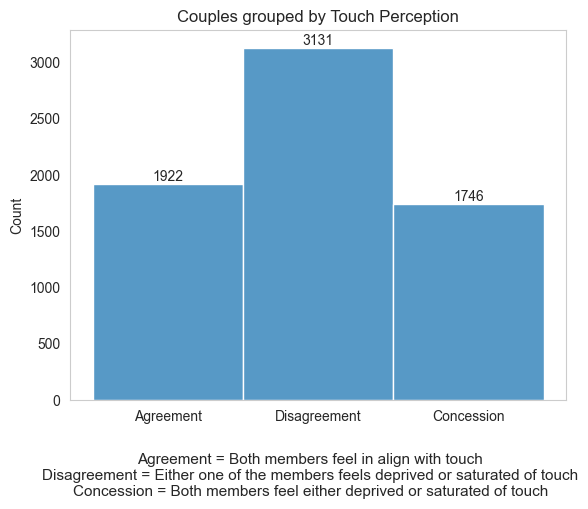

In [30]:
ax = sns.histplot(df2, x='Group')
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,
        height,
        int(height),
        ha="center", va="bottom",
        # palette=sns.color_palette("Set2", 2),
    )

plt.grid(False)
plt.xlabel("")
plt.title("Couples grouped by Touch Perception")
plt.suptitle("Agreement = Both members feel in align with touch"
             "\nDisagreement = Either one of the members feels deprived or saturated of touch"
             "\nConcession = Both members feel either deprived or saturated of touch",
             fontsize=11,
             y=-0
             )
# plt.savefig('output/img_bg/groups/histo_couples_group.png', dpi=350, transparent=False, bbox_inches='tight')
plt.show()

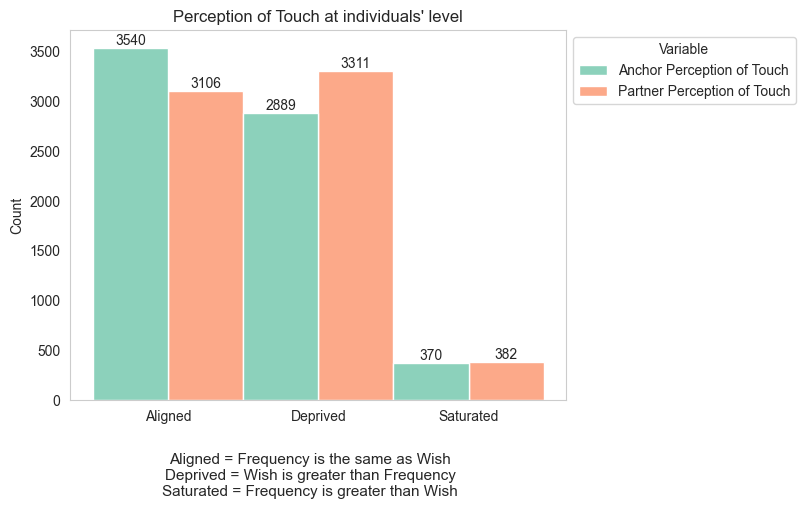

In [31]:
df_long = df2.melt(
    value_vars=["Anchor Perception of Touch", "Partner Perception of Touch"],
    var_name="Variable",
    value_name="Value"
)
ax = sns.histplot(
    data=df_long,
    x="Value",
    hue="Variable",
    bins=15,
    multiple="dodge",
    palette=sns.color_palette("Set2", 2),
)

for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,
        height,
        int(height),
        ha="center", va="bottom"
    )
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.grid(False)
plt.xlabel("")
plt.title("Perception of Touch at individuals' level")
plt.suptitle("Aligned = Frequency is the same as Wish"
             "\nDeprived = Wish is greater than Frequency"
             "\nSaturated = Frequency is greater than Wish",
             fontsize=11,
             y=-0
             )
# plt.savefig('output/img_bg/groups/histo_couple_members.png', dpi=350, transparent=False, bbox_inches='tight')
plt.show()

In [32]:
group_agreement = df2[df2['Group'] == 'Agreement']
group_disagreement = df2[df2['Group'] != 'Agreement']

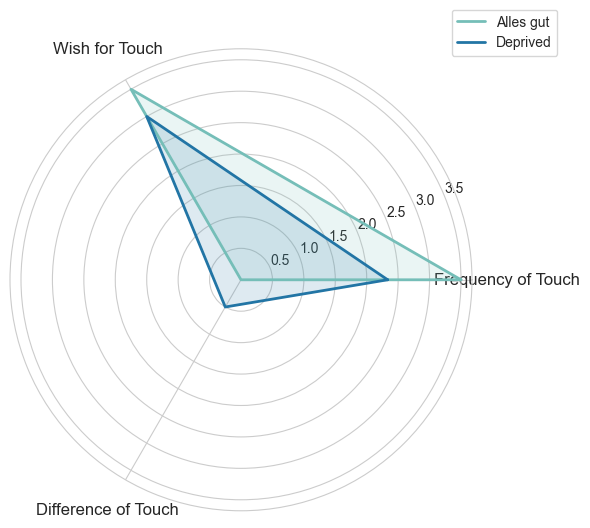

In [33]:
colors = [sns.color_palette('YlGnBu_d')[0], sns.color_palette('YlGnBu_d')[3], sns.color_palette('YlGnBu_d')[5]]

# Select your columns
cols = [
    'Couple Frequency of Touch',
    'Couple Wish for Touch',
    'Couple Difference of Touch'
]
# Calculate mean scores for each group
values1 = group_agreement[cols].median().values
values2 = group_disagreement[cols].median().values

categories = ['Frequency of Touch', 'Wish for Touch', 'Difference of Touch']
N = len(categories)

angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]  # close the loop

values1 = np.concatenate((values1, [values1[0]]))
values2 = np.concatenate((values2, [values2[0]]))

# Plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

ax.plot(angles, values1, linewidth=2, linestyle='solid', label='Alles gut', color=colors[0])
ax.fill(angles, values1, alpha=0.15, color=colors[0])

ax.plot(angles, values2, linewidth=2, linestyle='solid', label='Deprived', color=colors[1])
ax.fill(angles, values2, alpha=0.15, color=colors[1])

# Set labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=12)
ax.tick_params(axis='x', pad=15)  # move labels outward

plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.show()

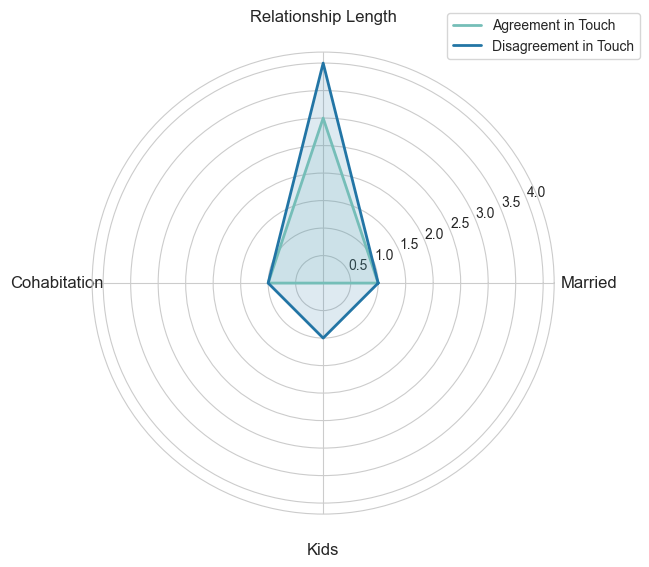

In [34]:
colors = [sns.color_palette('YlGnBu_d')[0], sns.color_palette('YlGnBu_d')[3], sns.color_palette('YlGnBu_d')[5]]

# Select your columns
cols = [
    'Married',
    'Relationship Length',
    'Cohabitation',
    'Kids'
]

# Calculate mean scores for each group
values1 = group_agreement[cols].median().values
values2 = group_disagreement[cols].median().values

# Categories (assume they are the same, just drop the "Anchor"/"Partner")
categories = ['Married', 'Relationship Length', 'Cohabitation', 'Kids']
N = len(categories)

# Angles for radar chart
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]  # close the loop

# Repeat first value to close the radar
values1 = np.concatenate((values1, [values1[0]]))
values2 = np.concatenate((values2, [values2[0]]))

# Plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

ax.plot(angles, values1, linewidth=2, linestyle='solid', label='Agreement in Touch', color=colors[0])
ax.fill(angles, values1, alpha=0.15, color=colors[0])

ax.plot(angles, values2, linewidth=2, linestyle='solid', label='Disagreement in Touch', color=colors[1])
ax.fill(angles, values2, alpha=0.15, color=colors[1])

# Set labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=12)
ax.tick_params(axis='x', pad=15)  # move labels outward

plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.show()

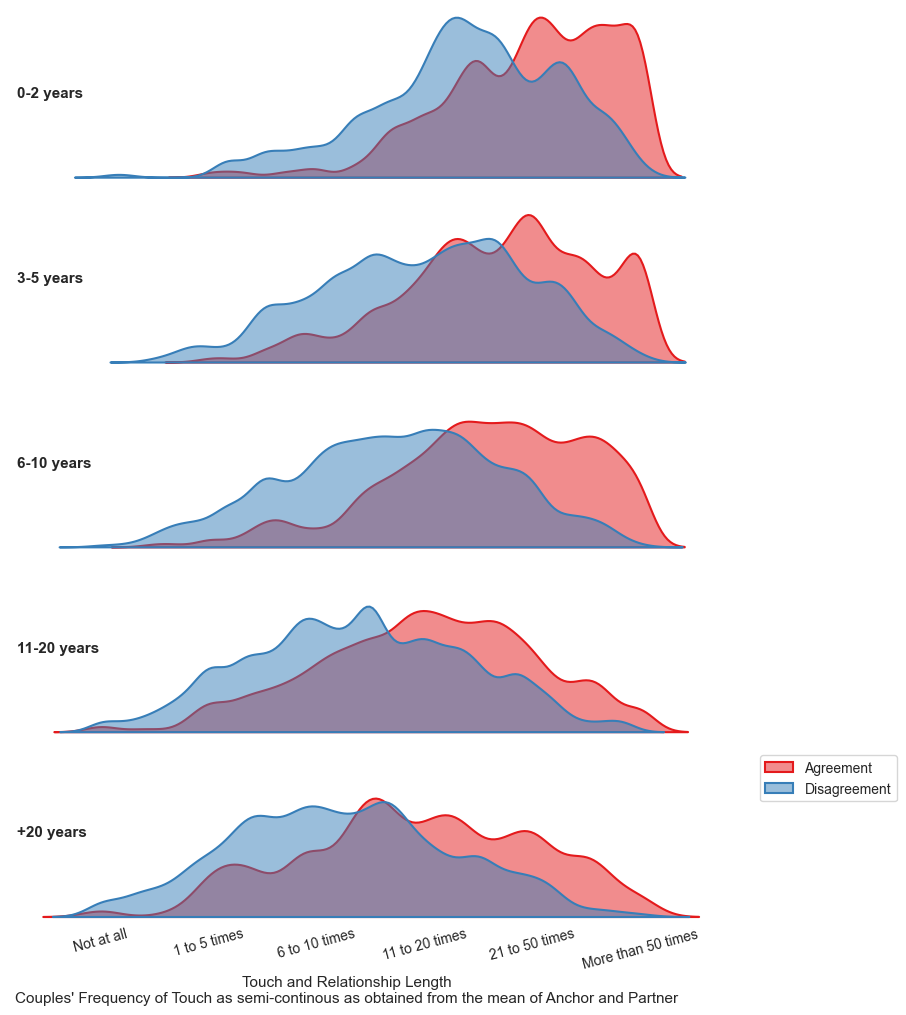

In [35]:
temp1 = 'Relationship Length'
temp2 = 'Cohabitation'
temp3 = 'Kids'

df3 = df2[df2['Group'] != 'Concession']

g = sns.FacetGrid(
    data=df3,
    row=temp1,
    hue="Group",
    aspect=4,
    height=2,
    palette=sns.color_palette("Set1", 2)
)

g.map(
    sns.kdeplot,
    "Couple Frequency of Touch",
    bw_adjust=0.5,
    clip_on=False,
    fill=True,
    alpha=0.5,
    linewidth=1.5
)
# g.refline(y=0, linewidth=2, linestyle="-", color="k", clip_on=False)
g.fig.subplots_adjust(hspace=0.1)

g.set_titles("")
g.set_xlabels("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

for i, ax in enumerate(g.axes.flatten()):
    labels = ["0-2 years", "3-5 years", "6-10 years", "11-20 years", "+20 years"]
    ax.text(
        0.01, 0.5, labels[i],
        transform=ax.transAxes,
        fontweight="bold",
        fontsize=11,
        ha="left", va="center"
    )
    ax.grid(False)

plt.xticks(
    ticks=[0, 1, 2, 3, 4, 5],
    labels=[
        "Not at all",
        '1 to 5 times',
        '6 to 10 times',
        '11 to 20 times',
        '21 to 50 times',
        'More than 50 times',
    ],
    rotation=15
)
plt.suptitle("Touch and Relationship Length"
             "\nCouples' Frequency of Touch as semi-continous as obtained from the mean of Anchor and Partner",
             # "\nCouples' Frequency of Touch rounded to the nearest integer",
             fontsize=11,
             y=-0
             )
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
# plt.savefig('output/img_bg/groups/kde_rel_len.png', dpi=350, transparent=False, bbox_inches='tight')
# plt.savefig('output/img_bg/groups/kde_rel_len_norm.png', dpi=350, transparent=False, bbox_inches='tight')

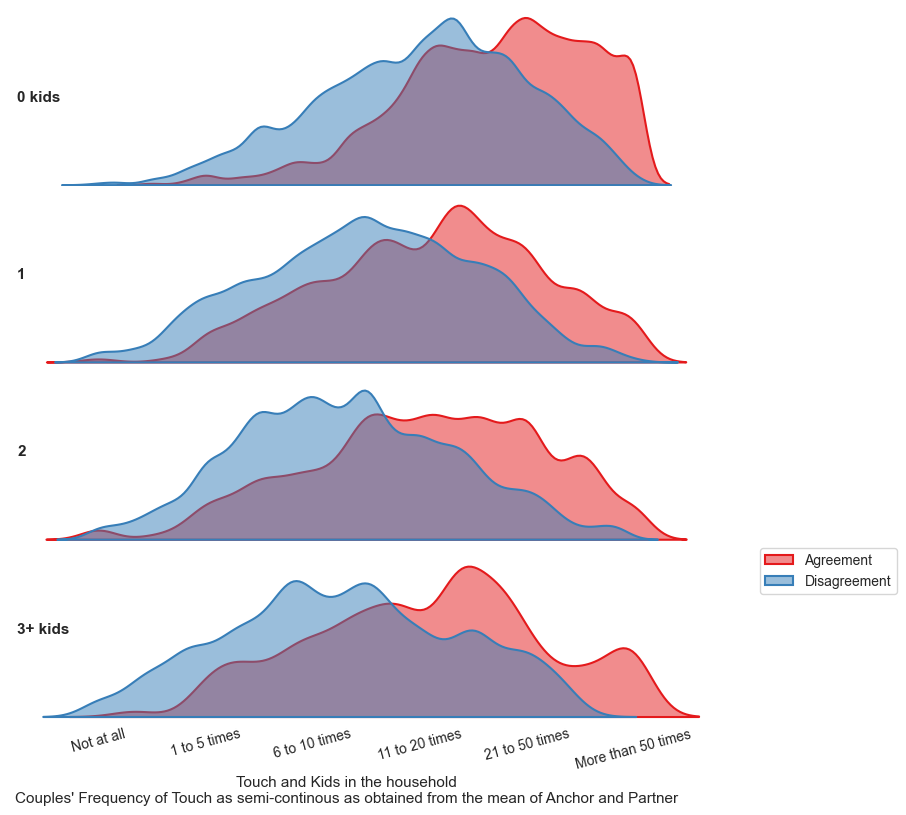

In [36]:
temp3 = 'Kids'

g = sns.FacetGrid(
    data=df3,
    row=temp3,
    hue="Group",
    aspect=4,
    height=2,
    palette=sns.color_palette("Set1", 2)
)

g.map(
    sns.kdeplot,
    "Couple Frequency of Touch",
    bw_adjust=0.5,
    clip_on=False,
    fill=True,
    alpha=0.5,
    linewidth=1.5
)

g.set_titles("")
g.set_xlabels("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

for i, ax in enumerate(g.axes.flatten()):
    labels = ["0 kids", "1", "2", "3+ kids"]
    ax.text(
        0.01, 0.5, labels[i],
        transform=ax.transAxes,
        fontweight="bold",
        fontsize=11,
        ha="left", va="center"
    )
    ax.grid(False)

g.fig.subplots_adjust(hspace=0.01)

plt.xticks(
    ticks=[0, 1, 2, 3, 4, 5],
    labels=[
        "Not at all",
        '1 to 5 times',
        '6 to 10 times',
        '11 to 20 times',
        '21 to 50 times',
        'More than 50 times',
    ],
    rotation=15
)
plt.suptitle("Touch and Kids in the household"
             "\nCouples' Frequency of Touch as semi-continous as obtained from the mean of Anchor and Partner",
             # "\nCouples' Frequency of Touch rounded to the nearest integer",
             fontsize=11,
             y=-0
             )
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
# plt.savefig('output/img_bg/groups/kde_kids.png', dpi=350, transparent=False, bbox_inches='tight')
# plt.savefig('output/img_bg/groups/kde_kids_norm.png', dpi=350, transparent=False, bbox_inches='tight')


In [37]:
m1 = {
    "Neuroticism": np.mean([group_agreement["Anchor Neuroticism"].mean(),
                            group_agreement["Partner Neuroticism"].mean()]),
    "Extraversion": np.mean([group_agreement["Anchor Extraversion"].mean(),
                             group_agreement["Partner Extraversion"].mean()]),
    "Openness": np.mean([group_agreement["Anchor Openness"].mean(),
                         group_agreement["Partner Openness"].mean()]),
    "Agreeableness": np.mean([group_agreement["Anchor Agreeableness"].mean(),
                              group_agreement["Partner Agreeableness"].mean()]),
    "Conscientiousness": np.mean([group_agreement["Anchor Conscientiousness"].mean(),
                                  group_agreement["Partner Conscientiousness"].mean()])}

m2 = {
    "Neuroticism": np.mean([group_disagreement["Anchor Neuroticism"].mean(),
                            group_disagreement["Partner Neuroticism"].mean()]),
    "Extraversion": np.mean([group_disagreement["Anchor Extraversion"].mean(),
                             group_disagreement["Partner Extraversion"].mean()]),
    "Openness": np.mean([group_disagreement["Anchor Openness"].mean(),
                         group_disagreement["Partner Openness"].mean()]),
    "Agreeableness": np.mean([group_disagreement["Anchor Agreeableness"].mean(),
                              group_disagreement["Partner Agreeableness"].mean()]),
    "Conscientiousness": np.mean([group_disagreement["Anchor Conscientiousness"].mean(),
                                  group_disagreement["Partner Conscientiousness"].mean()])}

In [38]:
trait_cols = [
    "Anchor Neuroticism", "Partner Neuroticism",
    "Anchor Extraversion", "Partner Extraversion",
    "Anchor Openness", "Partner Openness",
    "Anchor Agreeableness", "Partner Agreeableness",
    "Anchor Conscientiousness", "Partner Conscientiousness"
]

df_personality = df3.melt(
    id_vars="Group",
    value_vars=trait_cols,
    var_name="Role_Trait",
    value_name="Score"
)

df_personality[["Role", "Trait"]] = df_personality["Role_Trait"].str.split(" ", n=1, expand=True)

df_summary_personality = (
    df_personality
    .groupby(["Trait", "Group"])["Score"]
    .mean()
    .reset_index()
)

10.10272536687631
9.94049533612094
11.065535248041776
10.965898174831892
9.41816758026625
9.314583333333333
11.095772442588727
10.960275508569598
7.621932114882506
8.026256804354787
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

Extraversion_Agreement vs. Extraversion_Disagreement: Mann-Whitney-Wilcoxon test two-sided, P_val:9.646e-03 U_stat=1.232e+07
Neuroticism_Agreement vs. Neuroticism_Disagreement: Mann-Whitney-Wilcoxon test two-sided, P_val:8.416e-16 U_stat=1.083e+07
Openness_Agreement vs. Openness_Disagreement: Mann-Whitney-Wilcoxon test two-sided, P_val:8.501e-04 U_stat=1.233e+07
Agreeableness_Agreement vs. Agreeableness_Disagreement: Mann-Whitney-Wilcoxon test two-sided, P_val:4.936e-04 U_stat=1.245e+07
Conscientiousness_Agreement vs. Conscientiousness_Disagreement: Mann-Whitney-Wilcoxon test two-sided, P_val:1.565e-02 U_stat=1.230e+07


[Text(0.5, -52.64360107027056, ''), Text(69.22222222222221, 0.5, '')]

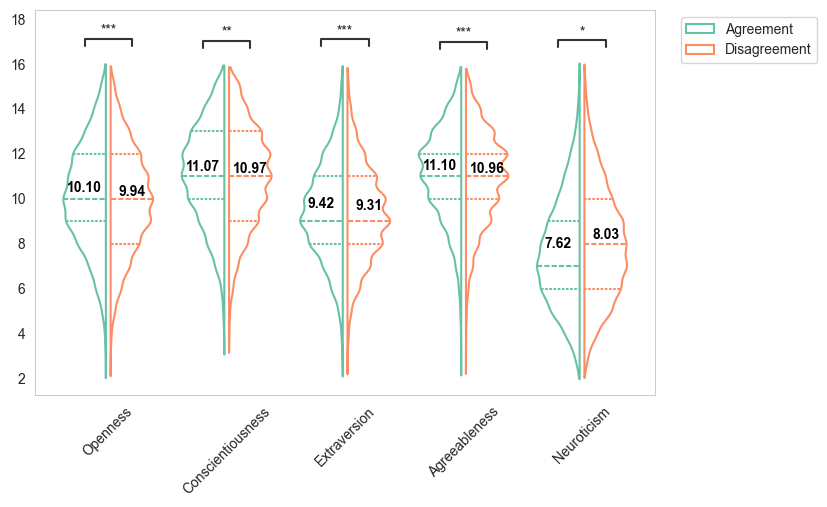

In [39]:

pairs = [
    (("Neuroticism", "Agreement"), ("Neuroticism", "Disagreement")),
    (("Extraversion", "Agreement"), ("Extraversion", "Disagreement")),
    (("Openness", "Agreement"), ("Openness", "Disagreement")),
    (("Agreeableness", "Agreement"), ("Agreeableness", "Disagreement")),
    (("Conscientiousness", "Agreement"), ("Conscientiousness", "Disagreement")),
]
x_order = ["Openness", "Conscientiousness", "Extraversion", "Agreeableness", "Neuroticism"]

plt.figure(figsize=(8, 5))

ax = sns.violinplot(
    data=df_personality, x="Trait", y="Score",
    hue="Group", palette=sns.color_palette("Set2", 2),
    order=x_order, fill=False, split=True, inner="quart",
    gap=.1, bw_adjust=1.15, linewidth=1.5,
    density_norm="count"
)
plt.xticks(rotation=45)

for i, trait in enumerate(x_order):
    for j, group in enumerate(df_summary_personality['Group'].unique()):
        mean_val = df_summary_personality[(df_summary_personality['Trait'] == trait) &
                                          (df_summary_personality['Group'] == group)]['Score'].values[0]
        print(mean_val)
        x_pos = i + (-0.2 if j == 0 else 0.2)
        ax.text(
            x_pos, mean_val + 0.05,  # slightly above mean
            f"{mean_val:.2f}",  # format to 2 decimals
            ha='center', va='bottom',
            fontsize=10, fontweight='bold',
            color='k'
        )

annot = Annotator(
    ax, pairs, data=df_personality, x="Trait",
    y="Score", hue="Group",
    plot="violinplot"
)
annot.configure(test='Mann-Whitney', verbose=2,
                pvalue_thresholds=[[0.001, '***'], [0.01, '**'], [0.05, '*'], [1, 'ns']])

annot.apply_test()
annot.annotate()

plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.grid(False)
ax.set(xlabel="", ylabel="")
# plt.savefig('output/img_bg/groups/violin_personality.png', dpi=350, transparent=False, bbox_inches='tight')

In [40]:
pairs = [
    (("Neuroticism", "Agreement"), ("Neuroticism", "Disagreement")),
    (("Extraversion", "Agreement"), ("Extraversion", "Disagreement")),
    (("Openness", "Agreement"), ("Openness", "Disagreement")),
    (("Agreeableness", "Agreement"), ("Agreeableness", "Disagreement")),
    (("Conscientiousness", "Agreement"), ("Conscientiousness", "Disagreement")),
]

results = []

for (trait1, group1), (trait2, group2) in pairs:
    scores1 = df_personality[(df_personality["Trait"] == trait1) &
                             (df_personality["Group"] == group1)]["Score"].dropna()
    scores2 = df_personality[(df_personality["Trait"] == trait2) &
                             (df_personality["Group"] == group2)]["Score"].dropna()

    u_stat, p_val = mannwhitneyu(scores1, scores2, alternative='two-sided')

    n1, n2 = len(scores1), len(scores2)
    mean_u = n1 * n2 / 2
    std_u = np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12)
    z = (u_stat - mean_u) / std_u
    r = z / np.sqrt(n1 + n2)

    results.append({
        "Trait": trait1,
        "Group1": group1,
        "Group2": group2,
        "U": u_stat,
        "p-value": p_val,
        "r": r
    })

results_df = pd.DataFrame(results)
print(results_df)

               Trait     Group1        Group2           U       p-value  \
0        Neuroticism  Agreement  Disagreement  10829200.5  8.416025e-16   
1       Extraversion  Agreement  Disagreement  12315326.0  9.646131e-03   
2           Openness  Agreement  Disagreement  12329762.0  8.500873e-04   
3      Agreeableness  Agreement  Disagreement  12449442.5  4.936302e-04   
4  Conscientiousness  Agreement  Disagreement  12300417.0  1.564622e-02   

          r  
0 -0.079558  
1  0.025508  
2  0.033013  
3  0.034293  
4  0.023851  


In [41]:
trait_cols = [
    "Anchor Depressiveness", "Partner Depressiveness",
    "Anchor Loneliness", "Partner Loneliness",
    "Anchor Self-esteem", "Partner Self-esteem",
    "Anchor Life Satisfaction", "Partner Life Satisfaction",
    "Anchor Health", "Partner Health"
]

df_wellbeing = df3.melt(
    id_vars="Group",
    value_vars=trait_cols,
    var_name="Role_Trait",
    value_name="Score"
)

# Step 4. Split Role and Trait into separate columns
df_wellbeing[["Role", "Trait"]] = df_wellbeing["Role_Trait"].str.split(" ", n=1, expand=True)

# Step 5. Average across roles per trait × group
df_summary_wellbeing = (
    df_wellbeing
    .groupby(["Trait", "Group"])["Score"]
    .mean()
    .reset_index()
)

4.822916666666667
5.110826803134495
1.61251629726206
1.8784822286263207
11.932566649242029
11.389165728982478
8.202030721166363
7.823153181963543
3.913586673607496
3.7654577408531713
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

Loneliness_Agreement vs. Loneliness_Disagreement: Mann-Whitney-Wilcoxon test two-sided, P_val:6.457e-38 U_stat=1.031e+07
Depressiveness_Agreement vs. Depressiveness_Disagreement: Mann-Whitney-Wilcoxon test two-sided, P_val:9.667e-18 U_stat=1.081e+07
Self-esteem_Agreement vs. Self-esteem_Disagreement: Mann-Whitney-Wilcoxon test two-sided, P_val:7.054e-28 U_stat=1.343e+07
Life Satisfaction_Agreement vs. Life Satisfaction_Disagreement: Mann-Whitney-Wilcoxon test two-sided, P_val:1.167e-33 U_stat=1.355e+07
Health_Agreement vs. Health_Disagreement: Mann-Whitney-Wilcoxon test two-sided, P_val:2.406e-20 U_stat=1.323e+07


[Text(0.5, -40.00406735656102, ''), Text(57.597222222222214, 0.5, '')]

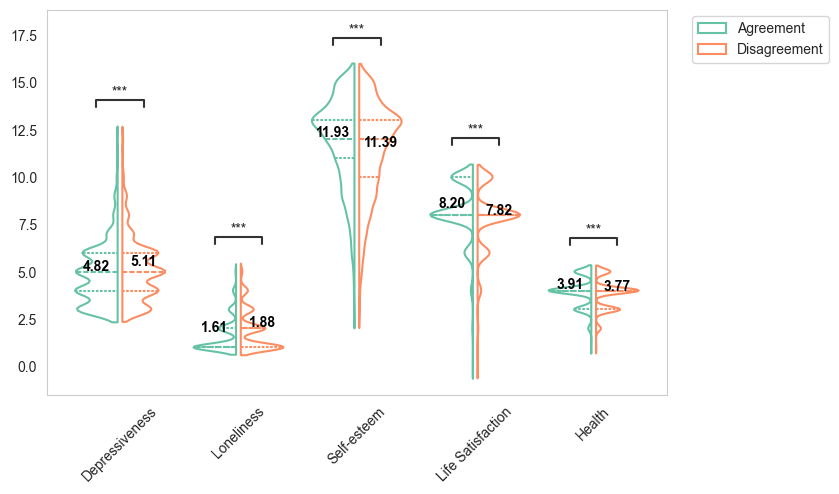

In [42]:
pairs = [
    (("Depressiveness", "Agreement"), ("Depressiveness", "Disagreement")),
    (("Loneliness", "Agreement"), ("Loneliness", "Disagreement")),
    (("Self-esteem", "Agreement"), ("Self-esteem", "Disagreement")),
    (("Life Satisfaction", "Agreement"), ("Life Satisfaction", "Disagreement")),
    (("Health", "Agreement"), ("Health", "Disagreement")),
]

x_order = ["Depressiveness", "Loneliness", "Self-esteem", "Life Satisfaction", "Health"]

plt.figure(figsize=(8, 5))

ax = sns.violinplot(
    data=df_wellbeing,
    x="Trait", y="Score",
    hue="Group", palette=sns.color_palette("Set2", 2),
    order=x_order, fill=False,
    split=True,
    inner="quart",
    bw_adjust=1.15,
    linewidth=1.5,
    gap=.1,
    density_norm="count"
)
plt.xticks(rotation=45)

for i, trait in enumerate(x_order):
    for j, group in enumerate(df_summary_wellbeing['Group'].unique()):
        mean_val = df_summary_wellbeing[(df_summary_wellbeing['Trait'] == trait) &
                                        (df_summary_wellbeing['Group'] == group)]['Score'].values[0]
        print(mean_val)
        x_pos = i + (-0.2 if j == 0 else 0.2)
        ax.text(
            x_pos, mean_val + 0.05,  # slightly above mean
            f"{mean_val:.2f}",  # format to 2 decimals
            ha='center', va='bottom',
            fontsize=10, fontweight='bold',
            color='k'
        )

annot = Annotator(
    ax, pairs, data=df_wellbeing, x="Trait",
    y="Score", hue="Group",
    plot="violinplot"
)
annot.configure(test='Mann-Whitney', verbose=2,
                pvalue_thresholds=[[0.001, '***'], [0.01, '**'], [0.05, '*'], [1, 'ns']])

annot.apply_test()
annot.annotate()

plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.grid(False)
ax.set(xlabel="", ylabel="")
# plt.savefig('output/img_bg/groups/violin_wellbeing.png', dpi=350, transparent=False, bbox_inches='tight')

In [43]:
trait_cols = [
    "Anchor Communication Quality", "Partner Communication Quality",
    "Anchor Conflict Management", "Partner Conflict Management",
    "Anchor Relationship Satisfaction", "Partner Relationship Satisfaction",
]

df_relationship = df3.melt(
    id_vars="Group",
    value_vars=trait_cols,
    var_name="Role_Trait",
    value_name="Score"
)

# Step 4. Split Role and Trait into separate columns
df_relationship[["Role", "Trait"]] = df_relationship["Role_Trait"].str.split(" ", n=1, expand=True)

# Step 5. Average across roles per trait × group
df_summary_relationship = (
    df_relationship
    .groupby(["Trait", "Group"])["Score"]
    .mean()
    .reset_index()
)

23.439124087591242
21.901769911504424
24.35065693430657
23.355508249068652
9.31319968758136
8.635230179028133
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

Conflict Management_Agreement vs. Conflict Management_Disagreement: Mann-Whitney-Wilcoxon test two-sided, P_val:4.928e-48 U_stat=1.140e+07
Communication Quality_Agreement vs. Communication Quality_Disagreement: Mann-Whitney-Wilcoxon test two-sided, P_val:8.425e-97 U_stat=1.219e+07
Relationship Satisfaction_Agreement vs. Relationship Satisfaction_Disagreement: Mann-Whitney-Wilcoxon test two-sided, P_val:3.686e-116 U_stat=1.489e+07


[Text(0.5, -78.01105684533795, ''), Text(69.22222222222221, 0.5, '')]

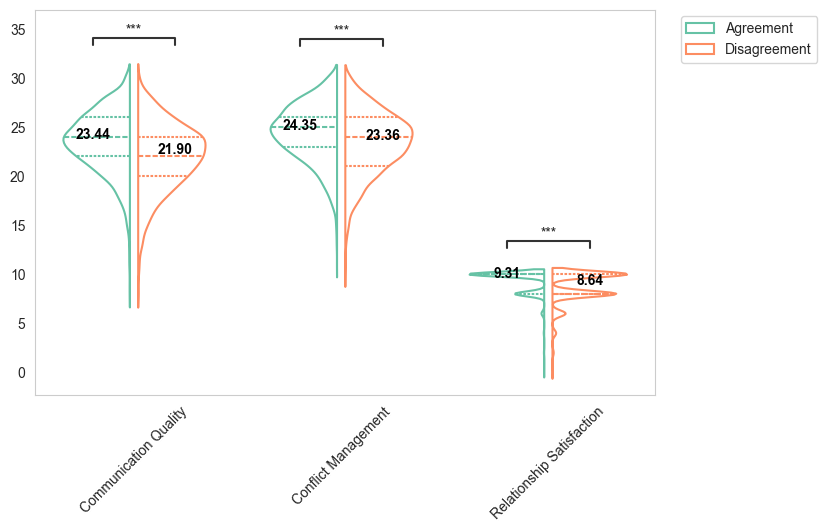

In [44]:
pairs = [
    (("Communication Quality", "Agreement"), ("Communication Quality", "Disagreement")),
    (("Conflict Management", "Agreement"), ("Conflict Management", "Disagreement")),
    (("Relationship Satisfaction", "Agreement"), ("Relationship Satisfaction", "Disagreement")),
]

x_order = ["Communication Quality", "Conflict Management", "Relationship Satisfaction"]

plt.figure(figsize=(8, 5))

ax = sns.violinplot(
    data=df_relationship, x="Trait", y="Score",
    hue="Group", palette=sns.color_palette("Set2", 2),
    order=x_order, fill=False, split=True, inner="quart",
    gap=.1, bw_adjust=1.15, linewidth=1.5,
    density_norm="count"
)
plt.xticks(rotation=45)

for i, trait in enumerate(x_order):
    for j, group in enumerate(df_summary_relationship['Group'].unique()):
        mean_val = df_summary_relationship[(df_summary_relationship['Trait'] == trait) &
                                           (df_summary_relationship['Group'] == group)]['Score'].values[0]
        print(mean_val)
        x_pos = i + (-0.2 if j == 0 else 0.2)
        ax.text(
            x_pos, mean_val + 0.05,  # slightly above mean
            f"{mean_val:.2f}",  # format to 2 decimals
            ha='center', va='bottom',
            fontsize=10, fontweight='bold',
            color='k'
        )

annot = Annotator(
    ax, pairs, data=df_relationship, x="Trait",
    y="Score", hue="Group",
    plot="violinplot"
)
annot.configure(test='Mann-Whitney', verbose=2,
                pvalue_thresholds=[[0.001, '***'], [0.01, '**'], [0.05, '*'], [1, 'ns']])

annot.apply_test()
annot.annotate()

plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.grid(False)
ax.set(xlabel="", ylabel="")
# plt.savefig('output/img_bg/groups/violin_relationship.png', dpi=350, transparent=False, bbox_inches='tight')